<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 10 **
** ┗ Insurance claim fraud prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Significant variable selection」
* 🥈SESSION 2 -「Find out the characteristics of fraud」
* 🥇SESSION 3 -「ML Utilization Fraud Transaction Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/10_Insurance Claim Fraud Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/10_Insurance Claim Fraud Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🚐😬 (Insurance cost processing)

``
In recent years, international oil prices have fallen, and oil prices have become cheaper.Many people buy more cars than usual.
Auto insurers have a happy day because new members are increasing, but they are worried on the other hand.The number of fraudulent cases of insurance claims
Because it is increasing.

``


> ** Looking at the data **

* Accident -related information and billing amount information about insurance claims
* Data specification ⬇

| Claim_number | AGE_OF_DRIVER | Gender | Marital_status | safty_rating | Annual_income |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Claim number | age | Gender | Marriage | Safety Score | Sales |
| HIGH_EDUCATION_IND | Address_Change_ind | Living_status | Zip_code | CLAIM_DATE
| State of high education | Post of the address | Living form | Postal code | Billing date | Counseling Day |
| Accident_site | PAST_NUM_OF_CLAIMS | Witness_Present_ind | liab_prcT | Channel | Policy_report_filed_ind |
| Accident Area | Past claims | Witnesses at the time of the accident | reliability | Receipt channel |
| Claim_est_payout | AGE_OF_VEHICLE | Vehicle_category | Vehicle_price | Vehicle_color | Vehicle_weight |
| Payment premiums | Automobile year | Automotive Type | Car price | Car color | Car weight |
| Fraud |
| Whether it's fraud |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter10_insurance.csv')
df.head(5)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Increased number of insurance claims
``


> ** Expected effect **

``
▶ Reduced number of insurance claims
``

> ** Solution **

``
▶ Management through reconsideration of high claims that are likely to be fraudulent
▶ Session 1 🥉
-Data pretreatment and meaningful variables and exploration
▶ Session 2 🥈
-Numeric (continuous, number type) variable and categorical (category) variable
▶ Session 3 🥇
-Exual use of ml algorithms to predict claims
``

> ** Performance measurement **

``
▶ Comparison of the number of cases before/after the claim fraud
``

> ** Public application **

``
▶ Production and loading of data MART defined in every month
▶ Extracting claims that are likely to be fraudulent using Model every month
▶ Prevention of fraudulent transactions through reconsideration
``

> ** Main code preview **

``
▶ Session 1 → DropNA (SubSet = [']], Fillna (0), List.append
▶ Session 2 → sns.distplot, np.where, pivot_table, columns.names
▶ Session 3 → Train_test_split, Classification_report, ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Select meaningful variable **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 17,998 ROW, 25 COL
print('df', df.shape)

df (17998, 25)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64


In [ ]:
# ▶ Drop from coles with low null values
df = df.dropna(subset=['claim_est_payout', 'age_of_vehicle'])

In [ ]:
# ▶ Drop from coles with low null values
print(df.isnull().sum())

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout             0
age_of_vehicle               0
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64


In [ ]:
# ▶ Converted to 0 with 0 converts to 0
df['marital_status'].fillna(0.0, inplace=True)
df['witness_present_ind'].fillna(0.0, inplace=True)

In [ ]:
print(df.isnull().sum())

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64


In [ ]:
df['fraud'].value_counts()

,count
fraud,
0,15161
1,2812


In [ ]:
# ▶ About 15.6%claim fraud rate
2812 / (2812 + 15182)

0.15627431366010894

### · Select meaningful variable
---
* What is a meaningful variable
-The variable that the data you want to predict by the variable * is well classified *
  

* Numeric variable
-The continuous variable is changed to a category variable through the intervalization, and *
(※ There is a difference in the morale transaction rate of the grouping group compared to the average fraudulent transaction rate.
  
* Categorical variable
-Check that the data you want to predict for each group is divided
(※ Each group has a difference in fraudulent transaction rate)


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [ ]:
df[numeric_list]

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.452350,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.452180,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.181950,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.273440,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,1.0,93,42338,1,0,15012,0,0.0,99,0,4806.841803,6.0,32144.571850,16868.53410,0
17994,29996,35,0.0,22,35579,1,1,20111,1,0.0,94,1,4089.794471,3.0,9468.510601,31500.99689,1
17995,29997,27,1.0,81,32953,0,1,15012,2,0.0,1,1,2225.803056,5.0,64974.369590,44536.25506,0
17996,29999,52,1.0,86,39519,1,0,15026,1,1.0,75,1,9560.744844,3.0,24983.268110,50093.75959,0


## ** 🥈Session 2 **
** ┗ Identify the characteristics of fraudulent transactions **
---


### · Numeric variable
---


In [ ]:
print("numeric_list :", numeric_list)

numeric_list : ['claim_number', 'age_of_driver', 'marital_status', 'safty_rating', 'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'fraud']


In [ ]:
df[numeric_list].head(5)

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
0,1,46,1.0,85,38301,1,1,80006,1,0.0,74,0,7530.940993,9.0,12885.45235,16161.33381,0
1,3,21,0.0,75,30445,0,1,15021,1,1.0,79,0,2966.024895,4.0,29429.45218,28691.96422,0
2,4,49,0.0,87,38923,0,1,20158,0,0.0,0,0,6283.888333,3.0,21701.18195,22090.94758,1
3,5,58,1.0,58,40605,1,0,15024,3,0.0,99,1,6169.747994,4.0,13198.27344,38329.58106,1
4,6,38,1.0,95,36380,1,0,50034,0,1.0,7,0,4541.387150,7.0,38060.21122,25876.56319,0


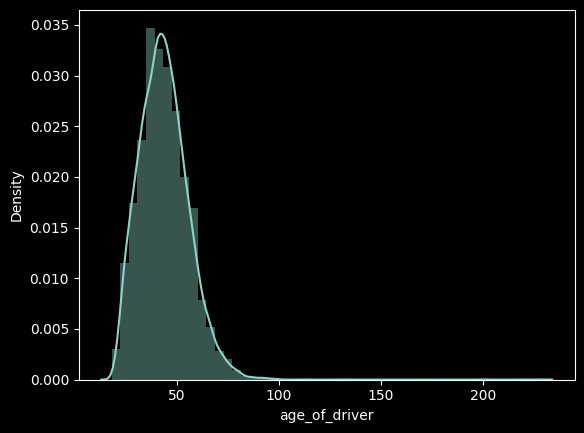

In [ ]:
# ▶ AGE_OF_DRIVER confirmed the distribution in the driver's age
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['age_of_driver']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['age_of_driver_gp'] = np.where (df['age_of_driver'] <= 30, 1,
                           np.where(df['age_of_driver'] <= 50, 2, 3))

df[['age_of_driver','age_of_driver_gp']]

,age_of_driver,age_of_driver_gp
0,46,2
1,21,1
2,49,2
3,58,3
4,38,2
...,...,...
17993,69,3
17994,35,2
17995,27,1
17996,52,3


In [ ]:
# ▶ claim fraud rate according to the intervalization
num_val='age_of_driver_gp'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([num_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,               # Pivot data frame
                      index = num_val,           # Passes in the line
                      columns = 'fraud',         # Heat to enter the column position
                      values = 'claim_number')   # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,age_of_driver_gp,0,1,ratio
0,1,2047.0,378.0,15.6
1,2,8838.0,1981.0,18.3
2,3,4276.0,453.0,9.6


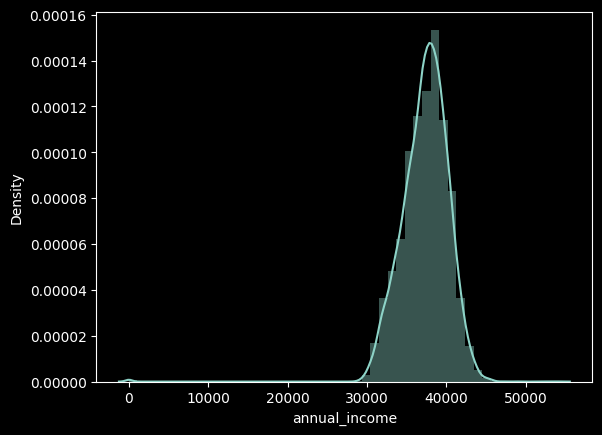

In [ ]:
# ▶ Check the distribution in annual_income (annual income)
sns.distplot(df['annual_income']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['annual_income_gp'] = np.where (df['annual_income'] <= 35000, 1,
                           np.where(df['annual_income'] <= 40000, 2, 3))

df[['annual_income','annual_income_gp']]

,annual_income,annual_income_gp
0,38301,2
1,30445,1
2,38923,2
3,40605,3
4,36380,2
...,...,...
17993,42338,3
17994,35579,2
17995,32953,1
17996,39519,2


In [ ]:
# ▶ claim fraud rate according to the intervalization
cat_val='annual_income_gp'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,               # Pivot data frame
                      index = cat_val,           # Passes in the line
                      columns = 'fraud',         # Heat to enter the column position
                      values = 'claim_number')   # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,annual_income_gp,0,1,ratio
0,1,3134.0,592.0,15.9
1,2,9222.0,1911.0,17.2
2,3,2805.0,309.0,9.9


### · categorical variable
---


In [ ]:
df[categoical_list]

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,M,Rent,12/16/2016,Friday,Local,Broker,Compact,white
1,F,Rent,2/12/2015,Thursday,Highway,Online,Large,white
2,F,Own,12/6/2016,Tuesday,Local,Broker,Compact,white
3,F,Own,5/5/2016,Thursday,Local,Broker,Medium,other
4,M,Rent,10/27/2015,Tuesday,Highway,Broker,Medium,gray
...,...,...,...,...,...,...,...,...
17993,M,Own,3/28/2015,Saturday,Local,Broker,Medium,black
17994,F,Own,1/5/2015,Monday,Local,Phone,Medium,blue
17995,F,Rent,9/10/2016,Saturday,Local,Online,Medium,black
17996,F,Own,12/25/2015,Friday,Highway,Broker,Compact,white


In [ ]:
df['claim_date'].head(5)

,claim_date
0,12/16/2016
1,2/12/2015
2,12/6/2016
3,5/5/2016
4,10/27/2015


In [ ]:
# ▶ Date data pretreatment (※ Split use)
df['year'] = df['claim_date'].apply(lambda x: x.split('/')[2])
df['month'] = df['claim_date'].apply(lambda x: x.split('/')[0])

df[['claim_date', 'year', 'month']]

,claim_date,year,month
0,12/16/2016,2016,12
1,2/12/2015,2015,2
2,12/6/2016,2016,12
3,5/5/2016,2016,5
4,10/27/2015,2015,10
...,...,...,...
17993,3/28/2015,2015,3
17994,1/5/2015,2015,1
17995,9/10/2016,2016,9
17996,12/25/2015,2015,12


In [ ]:
print("categoical_list :", categoical_list)

categoical_list : ['gender', 'living_status', 'claim_date', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']


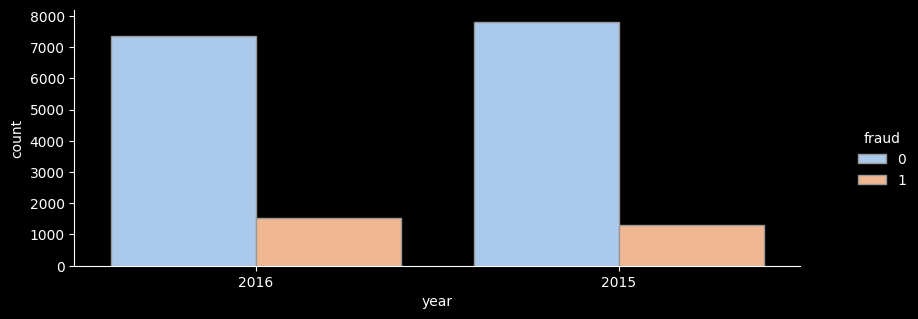

In [ ]:
# ▶ Comparison of fraud rate by year
sns.catplot(x="year", hue="fraud", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
cat_val='year'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,               # Pivot data frame
                      index = cat_val,           # Passes in the line
                      columns = 'fraud',         # Heat to enter the column position
                      values = 'claim_number')   # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values(by=['ratio'], ascending = False)

,year,0,1,ratio
1,2016,7355.0,1520.0,17.1
0,2015,7806.0,1292.0,14.2


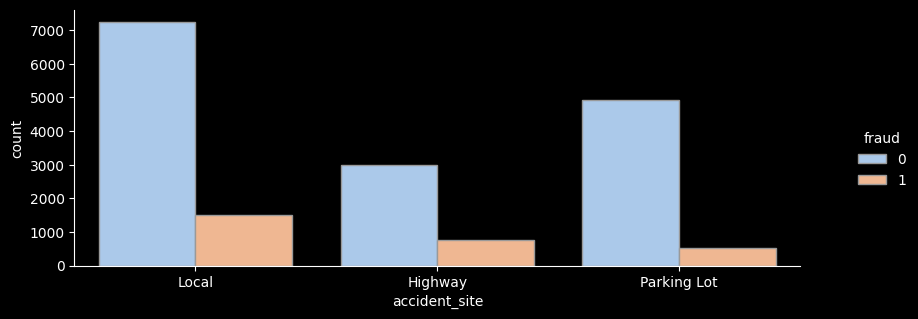

In [ ]:
# ▶ Comparison of claim fraud rate according to the accident site
sns.catplot(x="accident_site", hue="fraud", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
# ▶ Expressway> neighborhood> parking lot is ordered in the order of parking lot.
cat_val='accident_site'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'fraud'])['claim_number'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,               # Pivot data frame
                      index = cat_val,           # Passes in the line
                      columns = 'fraud',         # Heat to enter the column position
                      values = 'claim_number')   # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values(by=['ratio'], ascending = False)

,accident_site,0,1,ratio
0,Highway,2980.0,772.0,20.6
1,Local,7251.0,1509.0,17.2
2,Parking Lot,4930.0,531.0,9.7



## ** 🥇Session 3 **
** ┗ ML Utilization Fraud Transaction Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,age_of_driver_gp,annual_income_gp,year,month
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,9.0,Compact,12885.45235,white,16161.33381,0,2,2,2016,12
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,4.0,Large,29429.45218,white,28691.96422,0,1,1,2015,2
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,3.0,Compact,21701.18195,white,22090.94758,1,2,2,2016,12
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,4.0,Medium,13198.27344,other,38329.58106,1,3,3,2016,5
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7.0,Medium,38060.21122,gray,25876.56319,0,2,2,2015,10


In [ ]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'age_of_driver_gp', 'annual_income_gp', 'year', 'month'],
      dtype='object')

In [ ]:
# ▶ Feature (x) and Y data to learn modeling
# ▶ YEAR, MONTH is added as a new derivative variable
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['claim_number', 'claim_date', 'year','age_of_driver_gp', 'annual_income_gp','fraud'], axis=1)
Y=df['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(12581, 23)
(12581,)
(5392, 23)
(5392,)


In [ ]:
categoical_list

['gender',
 'living_status',
 'claim_date',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color']

In [ ]:
# ▶ Categorical variables that will not be used are excluded from the list
categoical_list.remove('claim_date')

In [ ]:
# ▶ Additional variables are added because there are no newly added variables
categoical_list.append('month')
categoical_list

['gender',
 'living_status',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color',
 'month']

In [ ]:
df[categoical_list]

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
0,M,Rent,Friday,Local,Broker,Compact,white,12
1,F,Rent,Thursday,Highway,Online,Large,white,2
2,F,Own,Tuesday,Local,Broker,Compact,white,12
3,F,Own,Thursday,Local,Broker,Medium,other,5
4,M,Rent,Tuesday,Highway,Broker,Medium,gray,10
...,...,...,...,...,...,...,...,...
17993,M,Own,Saturday,Local,Broker,Medium,black,3
17994,F,Own,Monday,Local,Phone,Medium,blue,1
17995,F,Rent,Saturday,Local,Online,Medium,black,9
17996,F,Own,Friday,Highway,Broker,Compact,white,12


In [ ]:
# ▶ Categorical (category) variables must be changed to numeric variables via one-hot-encoding or label-encoding
# ▶ One-Hot-Encoding is disadvantageous for a variable with a lot of dimensions, and label-encoding is difficult to use in regression algorithms.
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

gender
living_status
claim_day_of_week
accident_site
channel
vehicle_category
vehicle_color
month


In [ ]:
x_train[categoical_list].head(3)

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
7353,0,0,4,2,0,2,3,10
10990,1,0,5,0,2,2,3,4
16537,1,1,6,1,2,2,4,8


In [ ]:
x_test[categoical_list].head(3)

,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,month
11304,1,0,2,0,1,1,3,1
3837,1,0,2,1,0,0,0,1
5194,1,1,1,2,1,1,1,6


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
import lightgbm as lgb
# ▶ Hyper parametre setting

d_train = lgb.Dataset (x_train, label = y_train)

params = {}
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4 # Maximum Leaves is 2^(max_depth)
params ['seed'] = 23456
# ▶ Learning
clf = lgb.train (params, d_train, 500) # Model training at 1000 EPOCS


[LightGBM] [Info] Number of positive: 1968, number of negative: 10613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1603
[LightGBM] [Info] Number of data points in the train set: 12581, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156426 -> initscore=-1.685062
[LightGBM] [Info] Start training from score -1.685062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.3:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.3:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10613
           1       0.48      0.19      0.28      1968

    accuracy                           0.84     12581
   macro avg       0.67      0.58      0.59     12581
weighted avg       0.80      0.84      0.81     12581

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4548
           1       0.40      0.16      0.23       844

    accuracy                           0.83      5392
   macro avg       0.63      0.56      0.57      5392
weighted avg       0.79      0.83      0.80      5392



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,5056
1.0,336


In [ ]:
# Suitable problems, the maximum performance of the Train and Test SET prevents overability.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.7543424701949365
roc_score_test : 0.7091350763003996


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    # FPR: The ratio of not predicting patients who are not cancer patients as cancer patients
    # TPR : Recall
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

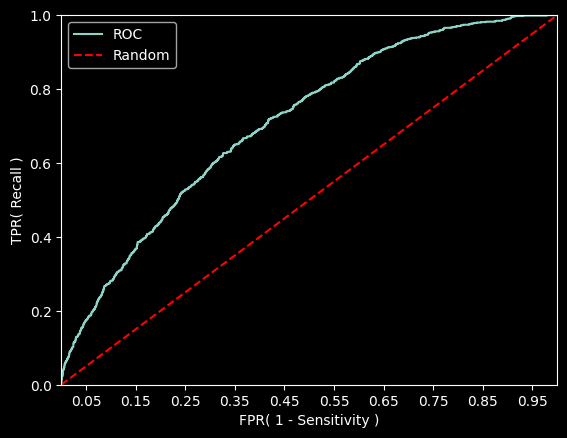

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


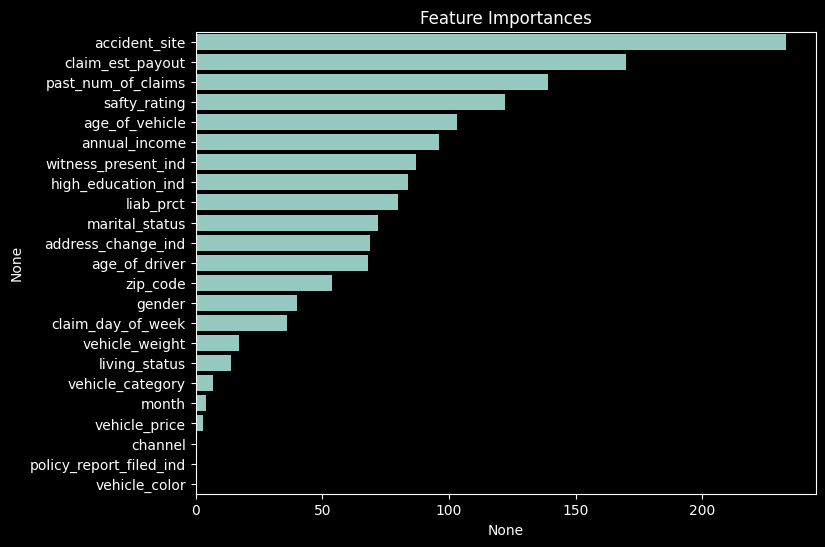

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

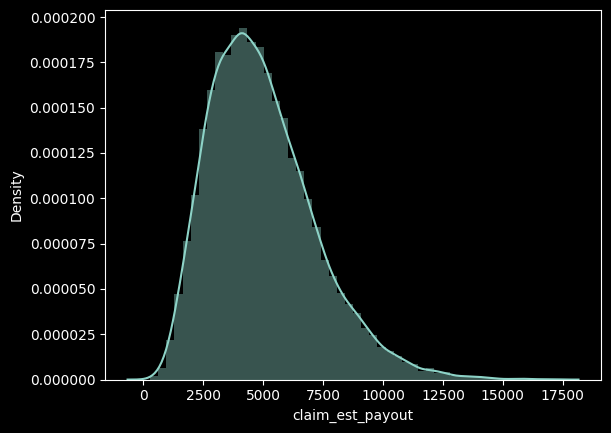

In [ ]:
# ▶ Details for important variables
sns.distplot(df['claim_est_payout']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['claim_est_payout_gp'] = np.where (df['claim_est_payout'] <= 2500, 1,
                           np.where(df['claim_est_payout'] <= 7500, 2, 3))

df[['claim_est_payout','claim_est_payout_gp']]

,claim_est_payout,claim_est_payout_gp
0,7530.940993,3
1,2966.024895,2
2,6283.888333,2
3,6169.747994,2
4,4541.387150,2
...,...,...
17993,4806.841803,2
17994,4089.794471,2
17995,2225.803056,1
17996,9560.744844,3


In [ ]:
df.groupby(['claim_est_payout_gp', 'fraud'])['fraud'].count()

claim_est_payout_gp  fraud
1                    0         1588
                     1          404
2                    0        11703
                     1         1998
3                    0         1870
                     1          410
Name: fraud, dtype: int64

In [ ]:
# ▶ Claim_est_payout is more likely to be a claim fraud.
print("gp1 :", 404 / (404+1588))
print("gp2 :", 1998 / (1998+11703))
print("gp3 :", 410 / (410+1870))

gp1 : 0.20281124497991967
gp2 : 0.14582877162250932
gp3 : 0.17982456140350878


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(clf)

# Model READ
clf_from_pickle = pickle.loads(saved_model)